# TD SENSITIVITY ANALYSIS PART 2

#### In this TD we will perform a sensitivity analysis on FSPM models, to estimate the influence of architectural traits in light interception
##### Students should refer to the codes in TD_SensitivityAnalysis_Part1

In [35]:
# load/install the packages

packs <- c( "sensitivity", "lhs", "ggplot2",'dplyr','ggrepel','plotly')
InstIfNec<-function (pack) {
  if (!do.call(require,as.list(pack))) {
    do.call(install.packages,as.list(pack))  }
  do.call(require,as.list(pack)) }
lapply(packs, InstIfNec)



[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

In [2]:
#set random sampling method and seed
RNGkind(kind="L'Ecuyer-CMRG")
set.seed(1)

# Exercice 1: light interception of maize using the Morris' Method

![Expample of illuminated 3D mock ups of Maize](img/exempleMaize.JPG)

### Description of model parameters (name, definition and range values)

#### plant_height: plant height (cm) [50,300]
#### rmax: relative position in height where the leaf with highest area is located [0.1,0.9]
#### skew: skewness of leaf area distribution [0.05,1]
#### wl: ratio width/length of leaf [0.01,0.5]
#### incli_top: leaf insertion inclination of the lowest leaf on the stem (degree) 0,75]
####  delta_angle_top: difference angle between insertion and leaf tip ~leaf curavture parameter (degree)  [0,250]
####  plant_orientation: plant orientation in azimtuh (degree) (0°= inter-row)  [0,90]
#### phyllotactic_angle: difference angle between two vertical rows of leaves on the stem (degree) (0° = superposed, 180° = oposed)  [0,180]
####  phyllotactic_deviation: leaf azimuth deviation from phyllotactic_angle (degree)  [0,90]

## $\Rrightarrow$ Design a Morris plan with 30 trajectories, 5 discretisation levels and 2 steps

In [169]:
# generate the data frame
parameters=c('plant_height','rmax','skew','wl','incli_top','delta_angle_top','plant_orientation','phyllotactic_angle','phyllotactic_deviation')

Pvar=data.frame(parameter=parameters,min=NA,max=NA) #generate a data frame
rownames(Pvar)=parameters

Pvar['plant_height',c('min','max')]=c(50,300) 
#relative position of the leaf with highest area
Pvar['rmax',c('min','max')]=c(0.1,0.9) 
#skewness of leaf area distribution 
Pvar['skew',c('min','max')]=c(0.05,1)
#ratio width/length of leaf
Pvar['wl',c('min','max')]=c(0.01,0.5)  
#insertion inclination of the lowest leaf on the stem (degree)
Pvar['incli_top',c('min','max')]=c(0,75) 
#difference angle between insertion and leaf tip (degree)
Pvar['delta_angle_top',c('min','max')]=c(0,250) 
#plant orientation in azimtuh (degree) (0°= inter-row)
Pvar['plant_orientation',c('min','max')]=c(0,90) 
#difference angle between two vertical rows of leaves on the stem (degree) (0° = superposed, 180° = oposed)
Pvar['phyllotactic_angle',c('min','max')]=c(0,180) 
#leaf azimuth deviation from phyllotactic_angle (degree)
Pvar['phyllotactic_deviation',c('min','max')]=c(0,90)

#check the data frame
print(Pvar)

                                    parameter   min   max
plant_height                     plant_height 50.00 300.0
rmax                                     rmax  0.10   0.9
skew                                     skew  0.05   1.0
wl                                         wl  0.01   0.5
incli_top                           incli_top  0.00  75.0
delta_angle_top               delta_angle_top  0.00 250.0
plant_orientation           plant_orientation  0.00  90.0
phyllotactic_angle         phyllotactic_angle  0.00 180.0
phyllotactic_deviation phyllotactic_deviation  0.00  90.0


In [170]:
#number of factors (parameters)
nFact= parameters
#number of trajectories
r=30
#inf limit
binf=Pvar[,'min']; names(binf)=parameters
#sup limit 
bsup=Pvar[,'max'];names(bsup)=parameters
#discretisation levels
Q=5
#discretisation step
step=2

### ⇛visualize the sampling

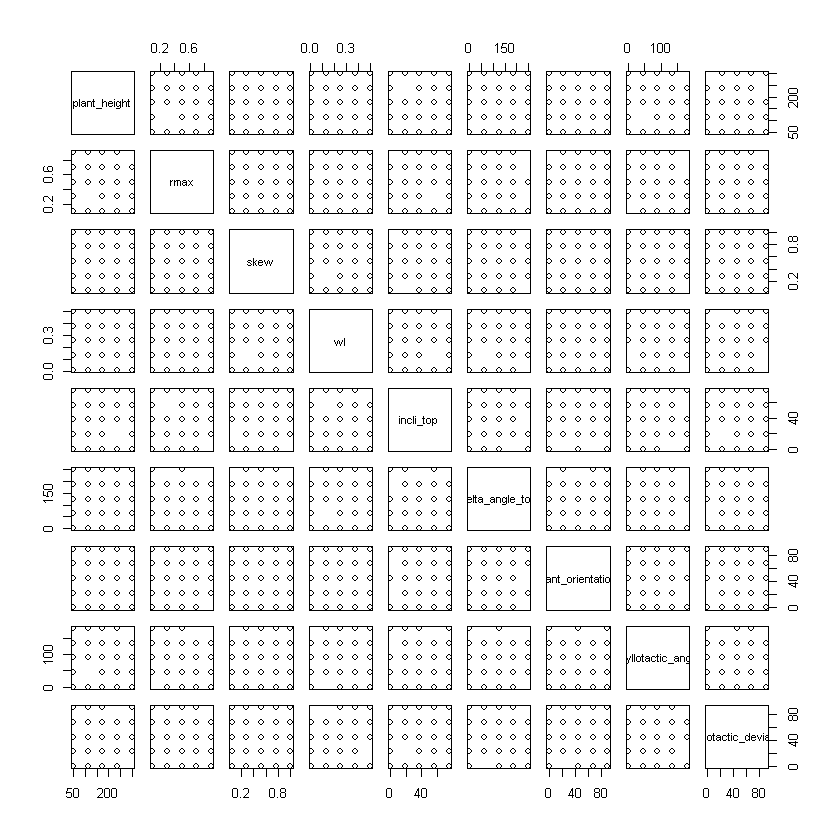

In [174]:
#plan
etude.morris=morris(model=NULL,factors=as.character(nFact),r=r,design=list(type='oat',levels=Q, grid.jump=step),scale=T,binf= binf,bsup=bsup)

planMorris=etude.morris$X

plot(as.data.frame(planMorris))

### The 3D mocks up are then coupled to a light interception model.  Because of the computational time required, the simulations on the Morris plan were performed upstream and are given in the file  data/ouput_Maize_Morris.csv. The model output extracted is the fraction of indicent light intercepted by the leaves (Ei)

In [175]:
### import simulations outputs
outputMorris=read.table('./data/output_Maize_Morris.csv',sep=';',dec='.',header=T)
summary(outputMorris)


      Simu              Ei        
 Min.   :  0.00   Min.   :0.2310  
 1st Qu.: 74.75   1st Qu.:0.5236  
 Median :149.50   Median :0.6159  
 Mean   :149.50   Mean   :0.6083  
 3rd Qu.:224.25   3rd Qu.:0.6886  
 Max.   :299.00   Max.   :0.9029  

##### ⇛ visualize the response in Ei to each parameters variation

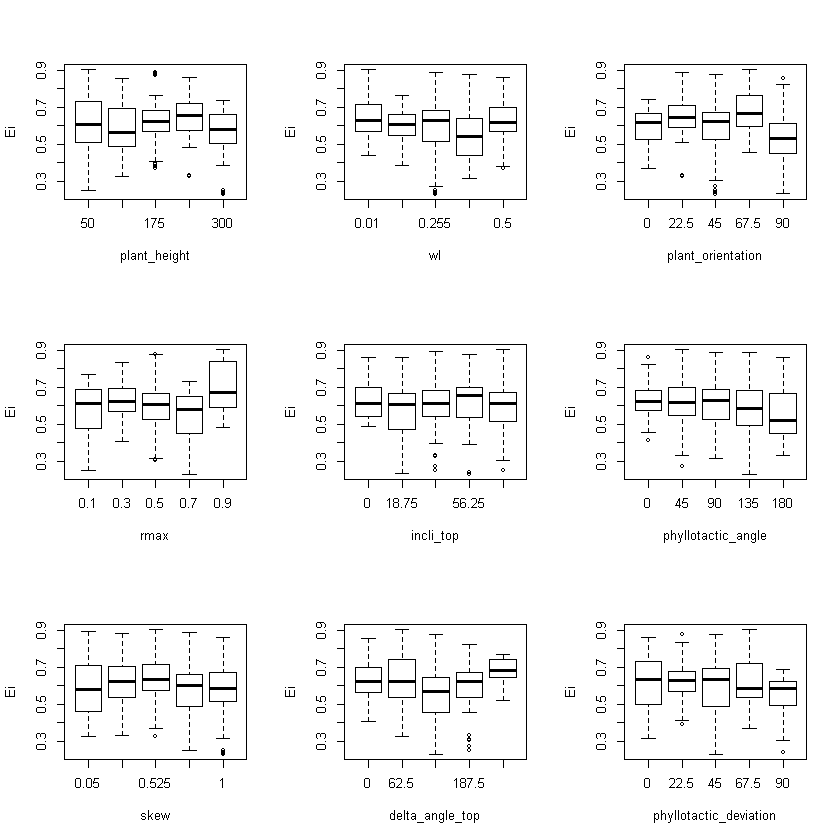

In [176]:
### run simulations of the model on the Morris plan
outputMorris=planMorris%>%
  as.data.frame()%>%
  mutate(Ei=outputMorris$Ei)

    ### visualize the response of the simple model to each parameters variation
par(mfcol=c(3,3))
    for (p in parameters){
 boxplot(split(outputMorris$Ei,outputMorris[,p]),xlab=p,ylab='Ei')
}

#### ⇛ Estimate and visualize Morris sensitivity indices 

In [177]:
out=tell(etude.morris,y= outputMorris$Ei)
print(etude.morris)


Call:
morris(model = NULL, factors = as.character(nFact), r = r, design = list(type = "oat",     levels = Q, grid.jump = step), binf = binf, bsup = bsup,     scale = T)

Model runs: 300 
                                 mu    mu.star      sigma
plant_height           -0.005187938 0.12489572 0.19330158
rmax                   -0.016022562 0.12055919 0.15734590
skew                   -0.052958421 0.12549225 0.18954247
wl                     -0.023154305 0.10195966 0.13797009
incli_top              -0.001344204 0.03576975 0.04985142
delta_angle_top        -0.032168442 0.13668369 0.23675245
plant_orientation       0.007869079 0.08538774 0.13427407
phyllotactic_angle      0.013788201 0.09817416 0.16101308
phyllotactic_deviation  0.021100622 0.09125594 0.15786652


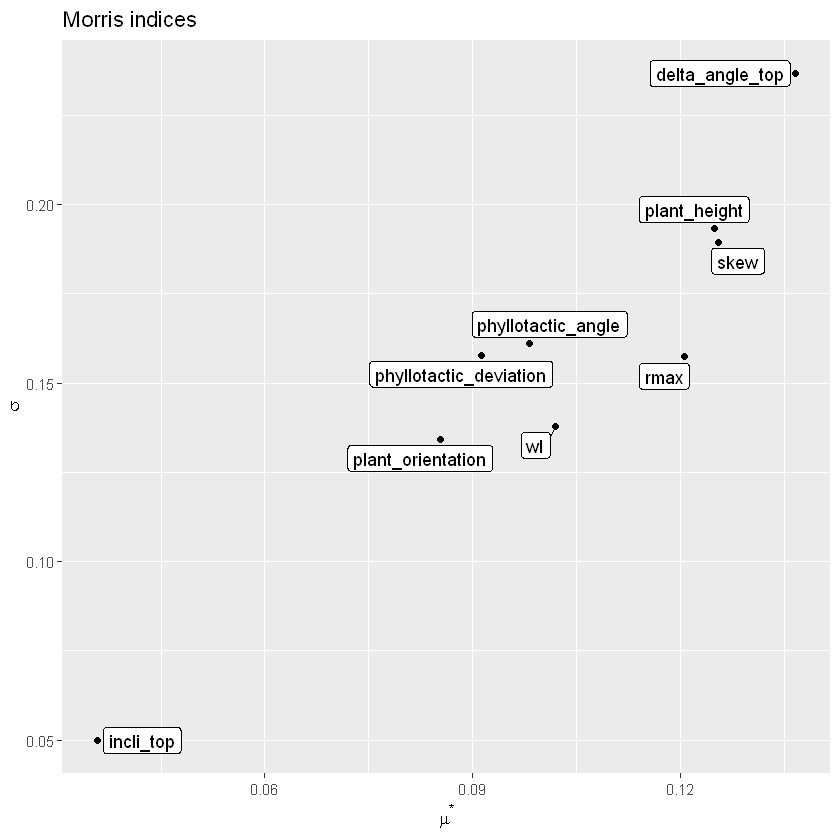

In [178]:
## visualize Morris sensitivity indices
res=data.frame(t(out$ee))
don_out=data.frame(parameter=parameters,mu=apply(X=res,MARGIN = 1,mean),mu_star=apply(X=abs(res),MARGIN = 1,mean),sd=apply(X=res,MARGIN = 1,sd))


###----graphs----####
# plot(etude.morris,main=paste('Morris indices for ',var))

graphMorris=ggplot(data=don_out,aes(x=mu_star,y=sd,label=parameter))+
  geom_point()+
  geom_label_repel()+
  xlab(expression(mu^'*'))+
  ylab(expression(sigma))+
  ggtitle(paste('Morris indices'))

print(graphMorris)

# Exercice 2: Light interception of apple tree using a metamodel

![Expample of illuminated 3D mock ups](img/illumAppelTree.JPG)

### Description of model parameters (name, definition and range values)

#### INSERTION_ANGLE: inclination angle of branches on the principal axe [0,90]
#### PHYLLOTAXY: azimuth angle between successives branches [0,359]
#### BRANCH_ELASTICITY: mechanical property of the branch [0,0.1]
#### INTERNODE_FLENGTH: internode final lenght [0,5]
#### LONGGU_PEAK_POSITION: relative position of the longest GU in the branch [0,0.9]


In [182]:
parameters=c('INSERTION_ANGLE','PHYLLOTAXY','BRANCH_ELASTICITY','INTERNODE_FLENGTH','LONGGU_PEAK_POSITION')

Pvar=data.frame(parameter=parameters,min=NA,max=NA) #generate a data frame
rownames(Pvar)=parameters

###----fix  min and max paramater values----####
#INSERTION_ANGLE
Pvar['INSERTION_ANGLE',c('min','max')]=c(0,90) #45
#PHYLLOTAXY
Pvar['PHYLLOTAXY',c('min','max')]=c(0,359) #144
#BRANCH_ELASTICITY 
Pvar['BRANCH_ELASTICITY',c('min','max')]=c(0,0.1) #0.06
#INTERNODE_FLENGTH
Pvar['INTERNODE_FLENGTH',c('min','max')]=c(0,5)  #3.5
#LONGGU_PEAK_POSITION
Pvar['LONGGU_PEAK_POSITION',c('min','max')]=c(0,0.9)   #0.5

#check the data frame
print(Pvar)


                                parameter min   max
INSERTION_ANGLE           INSERTION_ANGLE   0  90.0
PHYLLOTAXY                     PHYLLOTAXY   0 359.0
BRANCH_ELASTICITY       BRANCH_ELASTICITY   0   0.1
INTERNODE_FLENGTH       INTERNODE_FLENGTH   0   5.0
LONGGU_PEAK_POSITION LONGGU_PEAK_POSITION   0   0.9


## $\Rrightarrow$ Design a LHS plan with 4**5 = 3125 parameters sets

In [183]:
####function to generate the LHS plan
RandomLHS=function(factors,distribParameters,size,preserveDraw=FALSE){
  
  #set random seed
  RNGkind(kind="L'Ecuyer-CMRG")
  set.seed(1) 
  
  nbf=length(factors)
  design=randomLHS(n=size,k=nbf,preserveDraw = preserveDraw)
  for (i in 1:nbf){
    design[,i]=distribParameters[[1]][[i]]+design[,i]*(distribParameters[[2]][[i]]-distribParameters[[1]][[i]])
  }
  colnames(design)=factors
  resultats=as.data.frame(design)
  return(resultats)
}

In [184]:
distribParameters=Pvar[,c('min','max')]
size=length(parameters)**5
print(paste('Sample size =',size))
planLHS=RandomLHS(factors = parameters,size=size,distribParameters = distribParameters,preserveDraw=FALSE)

[1] "Sample size = 3125"


### ⇛visualize the sampling

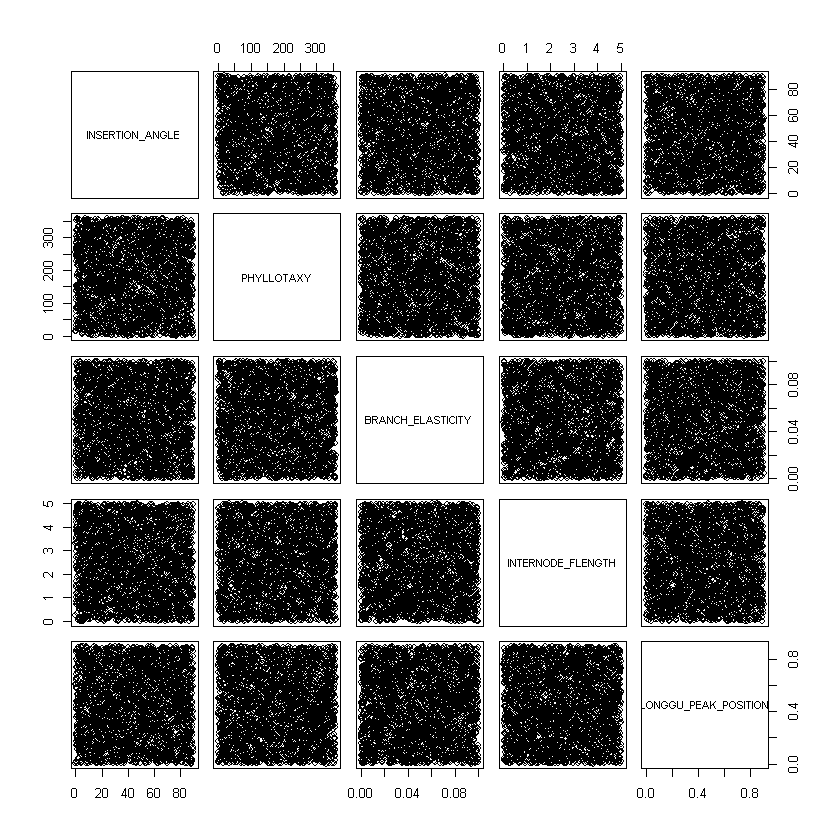

In [185]:
### visualize lhs
plot(planLHS)

### ⇛visualize the histogram of parameters value

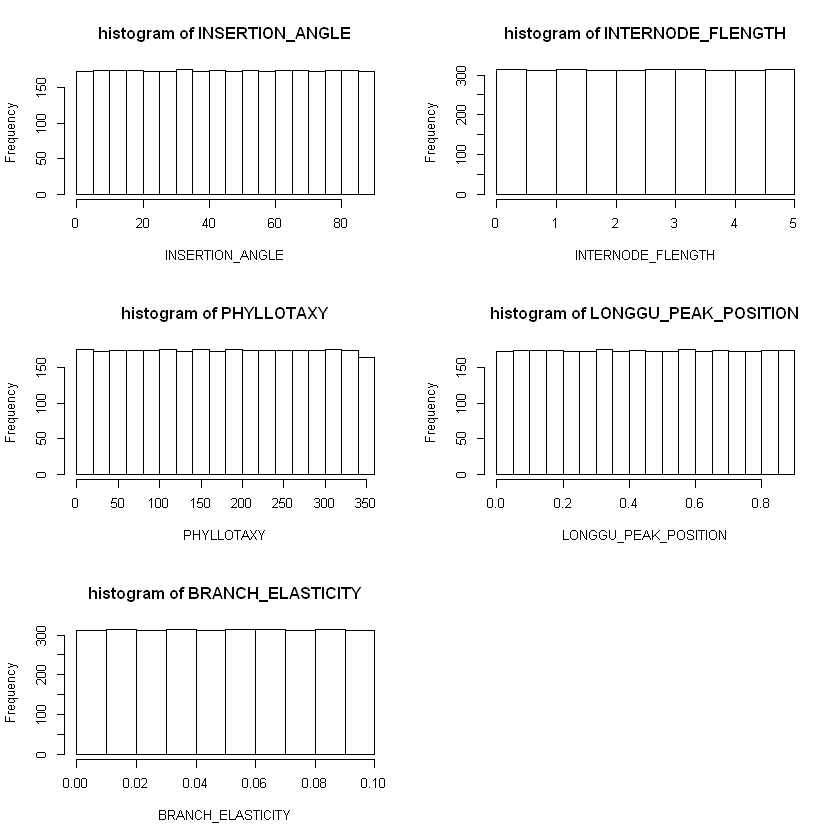

In [186]:
# histogram of parameters value
par(mfcol=c(3,2))
for (p in parameters){
    hist(planLHS[,p],xlab=p,main=paste('histogram of',p))
}

#### The 3D mocks up are then couple to a light interception model . Because of the computational time required, the simulations on the lhs plan were performed upstream and are given in the file  data/ouput_Apple_Lhs.csv. The model output extracted are: the fraction of indicent light intercepted by the leaves (Leaf_Ei), total leaf area (Leaf_area) and Fruit number (Fruit_nb).

In [187]:
### import simulations outputs
LhsOutputs=read.table('./data/output_Apple_Lhs.csv',sep=';',dec='.',header=T)
summary(LhsOutputs)


      Simu         Leaf_Ei          Leaf_area         Fruit_nb    
 Min.   :   0   Min.   :0.01045   Min.   :0.7114   Min.   : 5.00  
 1st Qu.: 781   1st Qu.:0.16847   1st Qu.:0.9776   1st Qu.:12.00  
 Median :1562   Median :0.30383   Median :1.3035   Median :15.00  
 Mean   :1562   Mean   :0.28761   Mean   :1.3327   Mean   :14.82  
 3rd Qu.:2343   3rd Qu.:0.41049   3rd Qu.:1.5314   3rd Qu.:16.00  
 Max.   :3124   Max.   :0.55181   Max.   :2.5484   Max.   :30.00  

### Define the metamodel

##### Here we will consider a ponynomial function of degree 3. Calibrate the model for each output (Leaf_area, Leaf_Ei and Fruit_nb) and perform the sensitivity analysis of the metamodel

In [188]:
## choosing the var
y='Leaf_area'

In [189]:
### add simulations outputs to the data frame
planLHS_sim=planLHS%>%
  mutate(y=LhsOutputs[,y])

### ⇛calibrate the metamodel

In [190]:
# calibration

MM=lm(formula=planLHS_sim$y~polym(INSERTION_ANGLE,PHYLLOTAXY,BRANCH_ELASTICITY,INTERNODE_FLENGTH,LONGGU_PEAK_POSITION,degree=3),data=planLHS_sim)


### ⇛ Estimate the variance explained by the model

In [197]:
# explained variance fort Leaf area
r2_total=summary(MM)$adj.r.squared
print(r2_total)

[1] 0.6458979


### ⇛  check and visualize model adjustment

`geom_smooth()` using formula 'y ~ x'



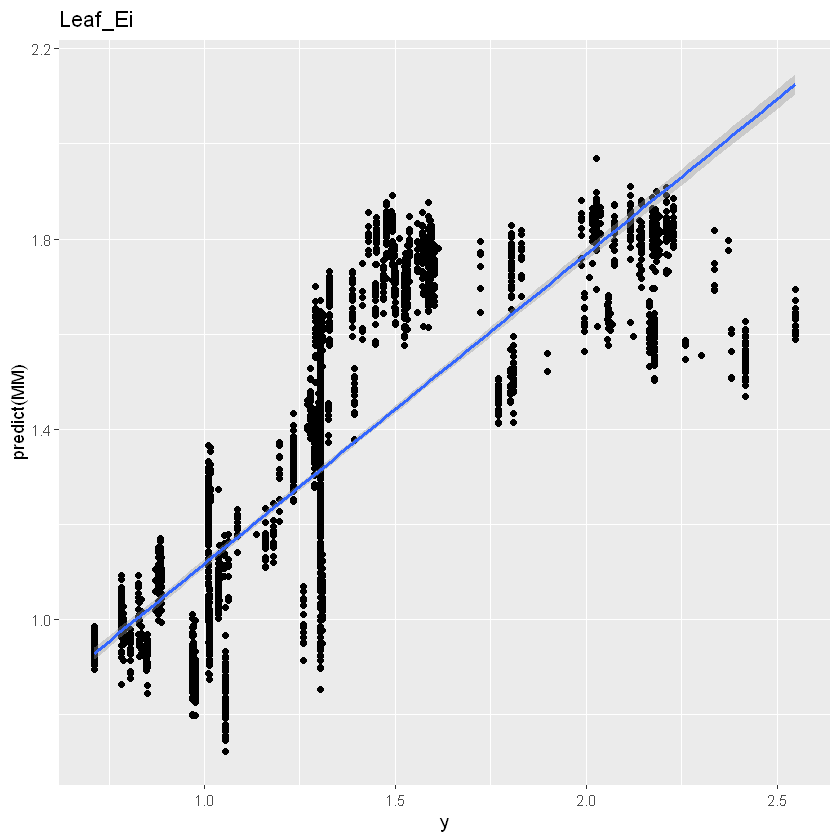

In [198]:
#check for model adjustment

graph_ajust=ggplot(data=planLHS_sim,aes(x=y,y=predict(MM)))+
  geom_point()+
  geom_smooth(method='lm')+
    ggtitle(var)

print(graph_ajust)


### ⇛  estimate the contribution of each term to the explained variance

In [200]:
## estimating the contribution of each term to the explained variance

tableLHS=NULL
V=planLHS[,1:(ncol(planLHS_sim)-1)]
for (i in 1:ncol(V)){
  v=paste(colnames(V)[i])
  
  model_seul=lm(formula=planLHS_sim[,'y']~polym(V[,i],degree=3),data=planLHS_sim)
  r2_seul=summary(model_seul)$adj.r.squared
  
  vecteur=data.frame(r=c(1:length(parameters)),c=c(1:length(parameters)))
  w=which(vecteur$c!=i)  
  
  model_sauf=lm(formula=planLHS_sim[,'y']~polym(V[,w[1]],V[,w[2]],V[,w[3]],V[,w[4]],degree=3),data=planLHS_sim) ##to adapt depending on V
  r2_sauf=summary(model_sauf)$adj.r.squared
  
  r2_spe=r2_total-r2_sauf  ##specific effect of the parameter
  r2_int_conf=r2_total-r2_sauf-r2_seul
  r2_int=ifelse(r2_int_conf>0,r2_int_conf,0) ### interaction effect
  r2_conf=ifelse(r2_int_conf>0,0,abs(r2_int_conf)) ###confusion effect (cannot differenciate if the effect comes from the parameters or the others)
  
  tableLHS_sub=data.frame(Alone=r2_seul,Specific=r2_spe,Interaction=r2_int,Confusion=r2_conf,row.names=v)
  tableLHS=rbind(tableLHS, tableLHS_sub)
}

assign(paste('table',var),tableLHS)

print(tableLHS)

                             Alone      Specific  Interaction Confusion
INSERTION_ANGLE      -8.072797e-04 -0.0006214879 0.0001857918         0
PHYLLOTAXY            2.582942e-05  0.0009465698 0.0009207404         0
BRANCH_ELASTICITY     4.306045e-04  0.0016731672 0.0012425627         0
INTERNODE_FLENGTH    -4.991016e-04  0.0015641170 0.0020632186         0
LONGGU_PEAK_POSITION  6.448728e-01  0.6468176656 0.0019448208         0


### ⇛ represent the contribution of parameters to explained variance

Warning message:
"Removed 1 rows containing missing values (position_stack)."


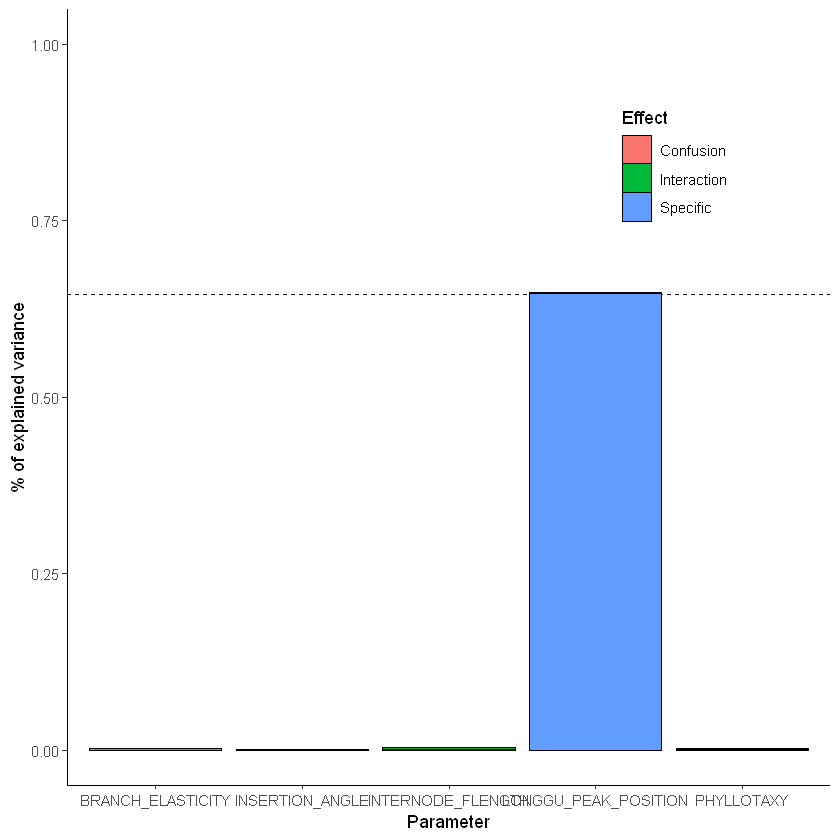

In [201]:
### contribution of parameters to explained variance
data_bar=data.frame(r2=c(tableLHS[,'Specific'],tableLHS[,'Interaction'],tableLHS[,'Confusion']),Effect=c(rep('Specific',nrow(tableLHS)),rep('Interaction',nrow(tableLHS)),rep('Confusion',nrow(tableLHS))),Parameter=rep(rownames(tableLHS),3))

graphDecomp=ggplot() + 
  geom_hline(yintercept=r2_total,lty=2)+
  geom_bar(data=data_bar, aes(fill=Effect,y=r2, x=Parameter), stat="identity",col=1,lwd=0.1)+
  ylab('')+
  ylim(0,1)+
  theme_classic()+
  ylab('% of explained variance')+
  theme(legend.position=c(0.8,0.8))

print(graphDecomp)

#### 3D mock up with the best Leaf_Ei --> ideotyping

![](img/optimAppleEi.png)

In [195]:
#### 3D mock up with the worst Leaf_Ei

![](img/worstAppleEi.png)